# Week 11 Live Session - Breakout Activities

First, import numpy and matplotlib by executing the cell below.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

print (np.__version__)

1.12.1


The file scores.csv contains actual grades from a recent semester of w200 (names have been stripped and rows permuted to prevent de-anonymization).

Examine the contents of the file.  Then read in the data and store it in two numpy arrays:  one called midterm and one called final.

In [2]:
# Normally, we would use pandas.read_csv() to do this in one or two lines.
# For this exercise, we'll do it the old fashioned way using tools from unit 9.

import csv

midterm_list = []
final_list = []

scores_file = open('scores.csv', 'rt')
csvin = csv.reader(scores_file)

# If you look at the file, you'll see that there's a header line.
# The next line skips that line so the for loop starts reading line 2.
next(csvin)

for row in csvin:
    midterm_list.append(int(row[0]))
    final_list.append(int(row[1]))

midterm = np.array(midterm_list)
final = np.array(final_list)

In [3]:
# Examine the output to see if things look right.
midterm, final

(array([ 97,  74,  92,  93, 100,  95,  98,  97,  92,  93,  90,  95,  99,
         88,  94,  94,  98,  92,  92,  97,  98,  95,  95,  90,  98,  99,
         78,  97,  97,  92,  59, 100,  95,  91,  95,  95,  69,  97,  95,
         96,  99,  98,  97,  90,  95,  97,  92,  92,  73,  91,  95,  91,
         95,  97,  92,  92,  92]),
 array([ 97,  92,  94,  93,  92,  99,  99,  99,  99,  83,  94,  99,  95,
         93,  94,  97, 100,  97,  94,  95,  93,  98,  92,  92,  99,  97,
         87,  97,  95,  92,  91,  99,  94,  95,  74,  98,  99,  85,  96,
         98,  98,  98, 100,  95,  96,  83,  83,  95,  84,  88,  97,  95,
         85,  88,  83,  93,  90]))

Compute the mean score for the midterms and the mean score for the finals.

In [4]:
midterm.mean(), final.mean()

(92.614035087719301, 93.456140350877192)

Compute how many students there are.

In [5]:
midterm.shape

(57,)

Create a boolean array called improving, which is True for students that score higher on the final than the midterm, and False for other students.

In [6]:
improving = final > midterm
improving

array([False,  True,  True, False, False,  True,  True,  True,  True,
       False,  True,  True, False,  True, False,  True,  True,  True,
        True, False, False,  True, False,  True,  True, False,  True,
       False, False, False,  True, False, False,  True, False,  True,
        True, False,  True,  True, False, False,  True,  True,  True,
       False, False,  True,  True, False,  True,  True, False, False,
       False,  True, False], dtype=bool)

Next, look at **only** the students that did better on the final than the midterm, and find their mean final score.

In [7]:
final[improving].mean()

95.612903225806448

Do the same for the remaining students - those that did worse on the final, or the same on the midterm and the final.

In [31]:
final[~improving].mean()

90.884615384615387

Compute how many students dropped 10 points or more from their midterm score to their final score

In [33]:
np.sum(final-midterm <= -10)

5

We become concerned that the average for the final is too low.  To correct this, we decide to randomly award some bonus points.  Specifically, for each student in the class, with probability 30%, we want to add a single bonus point to the final score.

First, please set the random seed by executing the instruction below.  This will ensure that different groups get the same result.

Second, generate an array of random numbers, each a uniform draw between zero and one.  (Check out np.random.rand)

You have to figure out what the next steps are!  Store your result in a new ndarray called curved_final (don't overwrite the original final scores).

In [9]:
np.random.seed(100)

# Your code here

In [10]:
bonus = (np.random.rand(midterm.shape[0])<.3).astype(np.int64)
curved_final = final + bonus
curved_final

array([ 97,  93,  94,  93,  93, 100,  99,  99, 100,  83,  94, 100,  96,
        94,  95,  97, 100,  98,  94,  96,  93,  98,  92,  92, 100,  97,
        88,  98,  95,  93,  91,  99,  95,  95,  75,  98,  99,  86,  96,
        98,  98,  98, 100,  96,  97,  83,  83,  96,  85,  88,  97,  95,
        85,  88,  83,  93,  91])

Run the instruction below to generate a scatterplot of midterm scores versus final scores

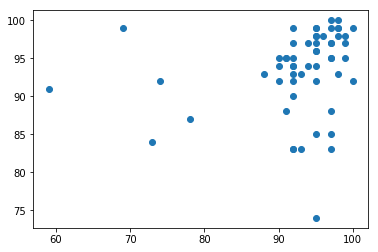

In [14]:
plt.scatter(midterm, final)

Now place the score data into a two-dimensional array with two columns.

You want each row to represent a different student.  You want the 0th column to represent the midterm score and the 1st column to represent the final score.  Call your new array all_grades

In [38]:
all_grades = np.vstack((midterm, final)).T
all_grades.shape

(57, 2)

Use array indexing on all_grades (square brackets) to pull out the array of scores for the student at index 10.

In [59]:
all_grades[10]

array([90, 94])

## Linear Modeling in Numpy

You develop a linear model that predicts how a student will do in the class based on their midterm grade and final grade.  Your model is as follows:

$$overall = w_1 midterm + w_2 final$$

You write this as the product of matrices:

$$overall = \begin{bmatrix}
    midterm & final
\end{bmatrix}
\begin{bmatrix}
    w_1 \\ w_2
\end{bmatrix}
$$

If you remember your matrix algebra, these two equations mean exactly the same thing.

You estimate $w_1=.4$ and $w_2 = .55$.

Create a numpy array called w to hold the matrix above.  You will need to use reshape() to get it into the right dimensions.  Check w.shape to make sure it is (2,1). 

In [60]:
w = np.array((.4, .55)).reshape((2,1))
w.shape

(2, 1)

Take the scores for student at the 10, and use reshape to make sure the shape is (1,2).  (These reshapes are important when doing matrix algebra, because numpy likes to drop dimensions when you're not looking, and that can lead to mistakes)

Compute the matrix product of these scores with w (use np.dot).  This will give you the model prediction for the overall grade for this student.

In [61]:
np.dot( all_grades[10].reshape((1,2)), w)

array([[ 87.7]])

Next, find the matrix product of the entire matrix all_grades with w.   if you think about how matrix multiplication works, this will give you an array of predicted overall grades for each student.  Store the result in a variable called predicted.

In [62]:
predicted = np.dot( all_grades,w)

Find the maximum overall grade predicted by your model.

In [56]:
predicted.max()

94.450000000000003